# Credit_Card_Fraud_Detection:
**Data Set Information:**


1.   The dataset contains transactions made by credit cards in September 2013 by European cardholders.
2.   This dataset presents transactions that occurred in two days, where we have 492 frauds out of 160,580 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


3. It contains only numerical input variables which are the result of a PCA transformation.   
4.  Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.


5.    The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.








**Import the necessary libraries:**

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load the dataset:**

In [2]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
160575,113471.0,2.055797,-0.326668,-2.752041,-0.842316,2.463072,3.173856,-0.432126,0.727706,0.608606,...,0.269765,0.844627,0.020675,0.726212,0.366624,-0.398828,0.027735,-0.060282,1.00,0.0
160576,113471.0,2.027248,-0.123314,-3.187138,-0.603106,2.685489,3.011201,-0.370792,0.722885,0.439019,...,0.198270,0.607648,0.011628,0.637274,0.286212,-0.081426,0.014987,-0.036266,12.14,0.0
160577,113471.0,-0.904898,1.131663,2.877922,4.645120,-0.684800,2.522137,-1.218386,1.178994,-0.383132,...,0.039884,0.559305,-0.438575,-0.960073,0.329436,0.739082,0.314542,0.086706,12.91,0.0
160578,113472.0,1.997105,0.449015,-2.478946,1.430360,1.144331,-0.773339,0.717322,-0.334020,0.109623,...,-0.039439,0.042502,-0.056210,0.297646,0.518700,-0.507040,-0.005483,-0.019878,35.95,0.0
160579,113472.0,-1.390029,-0.276928,0.183191,-0.009842,-0.993441,0.704187,3.179594,-0.718665,-0.716430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(160580, 31)

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160580 entries, 0 to 160579
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    160580 non-null  float64
 1   V1      160580 non-null  float64
 2   V2      160580 non-null  float64
 3   V3      160580 non-null  float64
 4   V4      160580 non-null  float64
 5   V5      160580 non-null  float64
 6   V6      160580 non-null  float64
 7   V7      160580 non-null  float64
 8   V8      160580 non-null  float64
 9   V9      160580 non-null  float64
 10  V10     160579 non-null  float64
 11  V11     160579 non-null  float64
 12  V12     160579 non-null  float64
 13  V13     160579 non-null  float64
 14  V14     160579 non-null  float64
 15  V15     160579 non-null  float64
 16  V16     160579 non-null  float64
 17  V17     160579 non-null  float64
 18  V18     160579 non-null  float64
 19  V19     160579 non-null  float64
 20  V20     160579 non-null  float64
 21  V21     16

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,...,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000
mean,57480.545242,-0.207315,0.051732,0.565654,0.137480,-0.208785,0.065082,-0.094873,0.041622,0.021107,...,-0.035850,-0.100085,-0.026058,0.010271,0.106234,0.014743,0.001845,0.002501,87.343062,0.002217
std,24648.739896,1.845212,1.615910,1.355699,1.360672,1.333667,1.291085,1.210891,1.239136,1.161060,...,0.745918,0.655277,0.585846,0.596814,0.455527,0.493072,0.392889,0.310177,245.159473,0.047033
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,40115.750000,-1.005531,-0.528291,0.039585,-0.718119,-0.851388,-0.681213,-0.592292,-0.153410,-0.662940,...,-0.231759,-0.549532,-0.171314,-0.328744,-0.173936,-0.330606,-0.064278,-0.016428,5.450000,0.000000
50%,58415.500000,-0.232236,0.120630,0.675769,0.147207,-0.253136,-0.194186,-0.041671,0.064074,-0.083914,...,-0.059066,-0.079427,-0.039814,0.062089,0.149179,-0.060187,0.009761,0.022106,21.500000,0.000000
75%,75826.250000,1.173304,0.811237,1.326370,0.960994,0.329968,0.452844,0.446030,0.359376,0.651366,...,0.117804,0.337116,0.092439,0.413072,0.406889,0.279121,0.089580,0.078114,76.710000,0.000000
max,113472.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
data['Class'].value_counts()

0.0    160223
1.0       356
Name: Class, dtype: int64

In [12]:
data['Class'] = data['Class'].astype(int)

In [13]:
data['Class'].value_counts()

0    160223
1       356
Name: Class, dtype: int64

In [14]:
legit = data[data.Class==0]
fraud = data[data.Class==1]

In [15]:
fraud['Class']

541       1
623       1
4920      1
6108      1
6329      1
         ..
156990    1
157585    1
157868    1
157871    1
157918    1
Name: Class, Length: 356, dtype: int64

In [16]:
print(legit.shape)
print(fraud.shape)

(160223, 31)
(356, 31)


In [17]:
legit.Amount.describe()

count    160223.000000
mean         87.288266
std         245.193096
min           0.000000
25%           5.480000
50%          21.520000
75%          76.565000
max       19656.530000
Name: Amount, dtype: float64

In [18]:
fraud.Amount.describe()

count     356.000000
mean      112.005000
std       228.517058
min         0.000000
25%         1.000000
50%         9.905000
75%       102.125000
max      1809.680000
Name: Amount, dtype: float64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

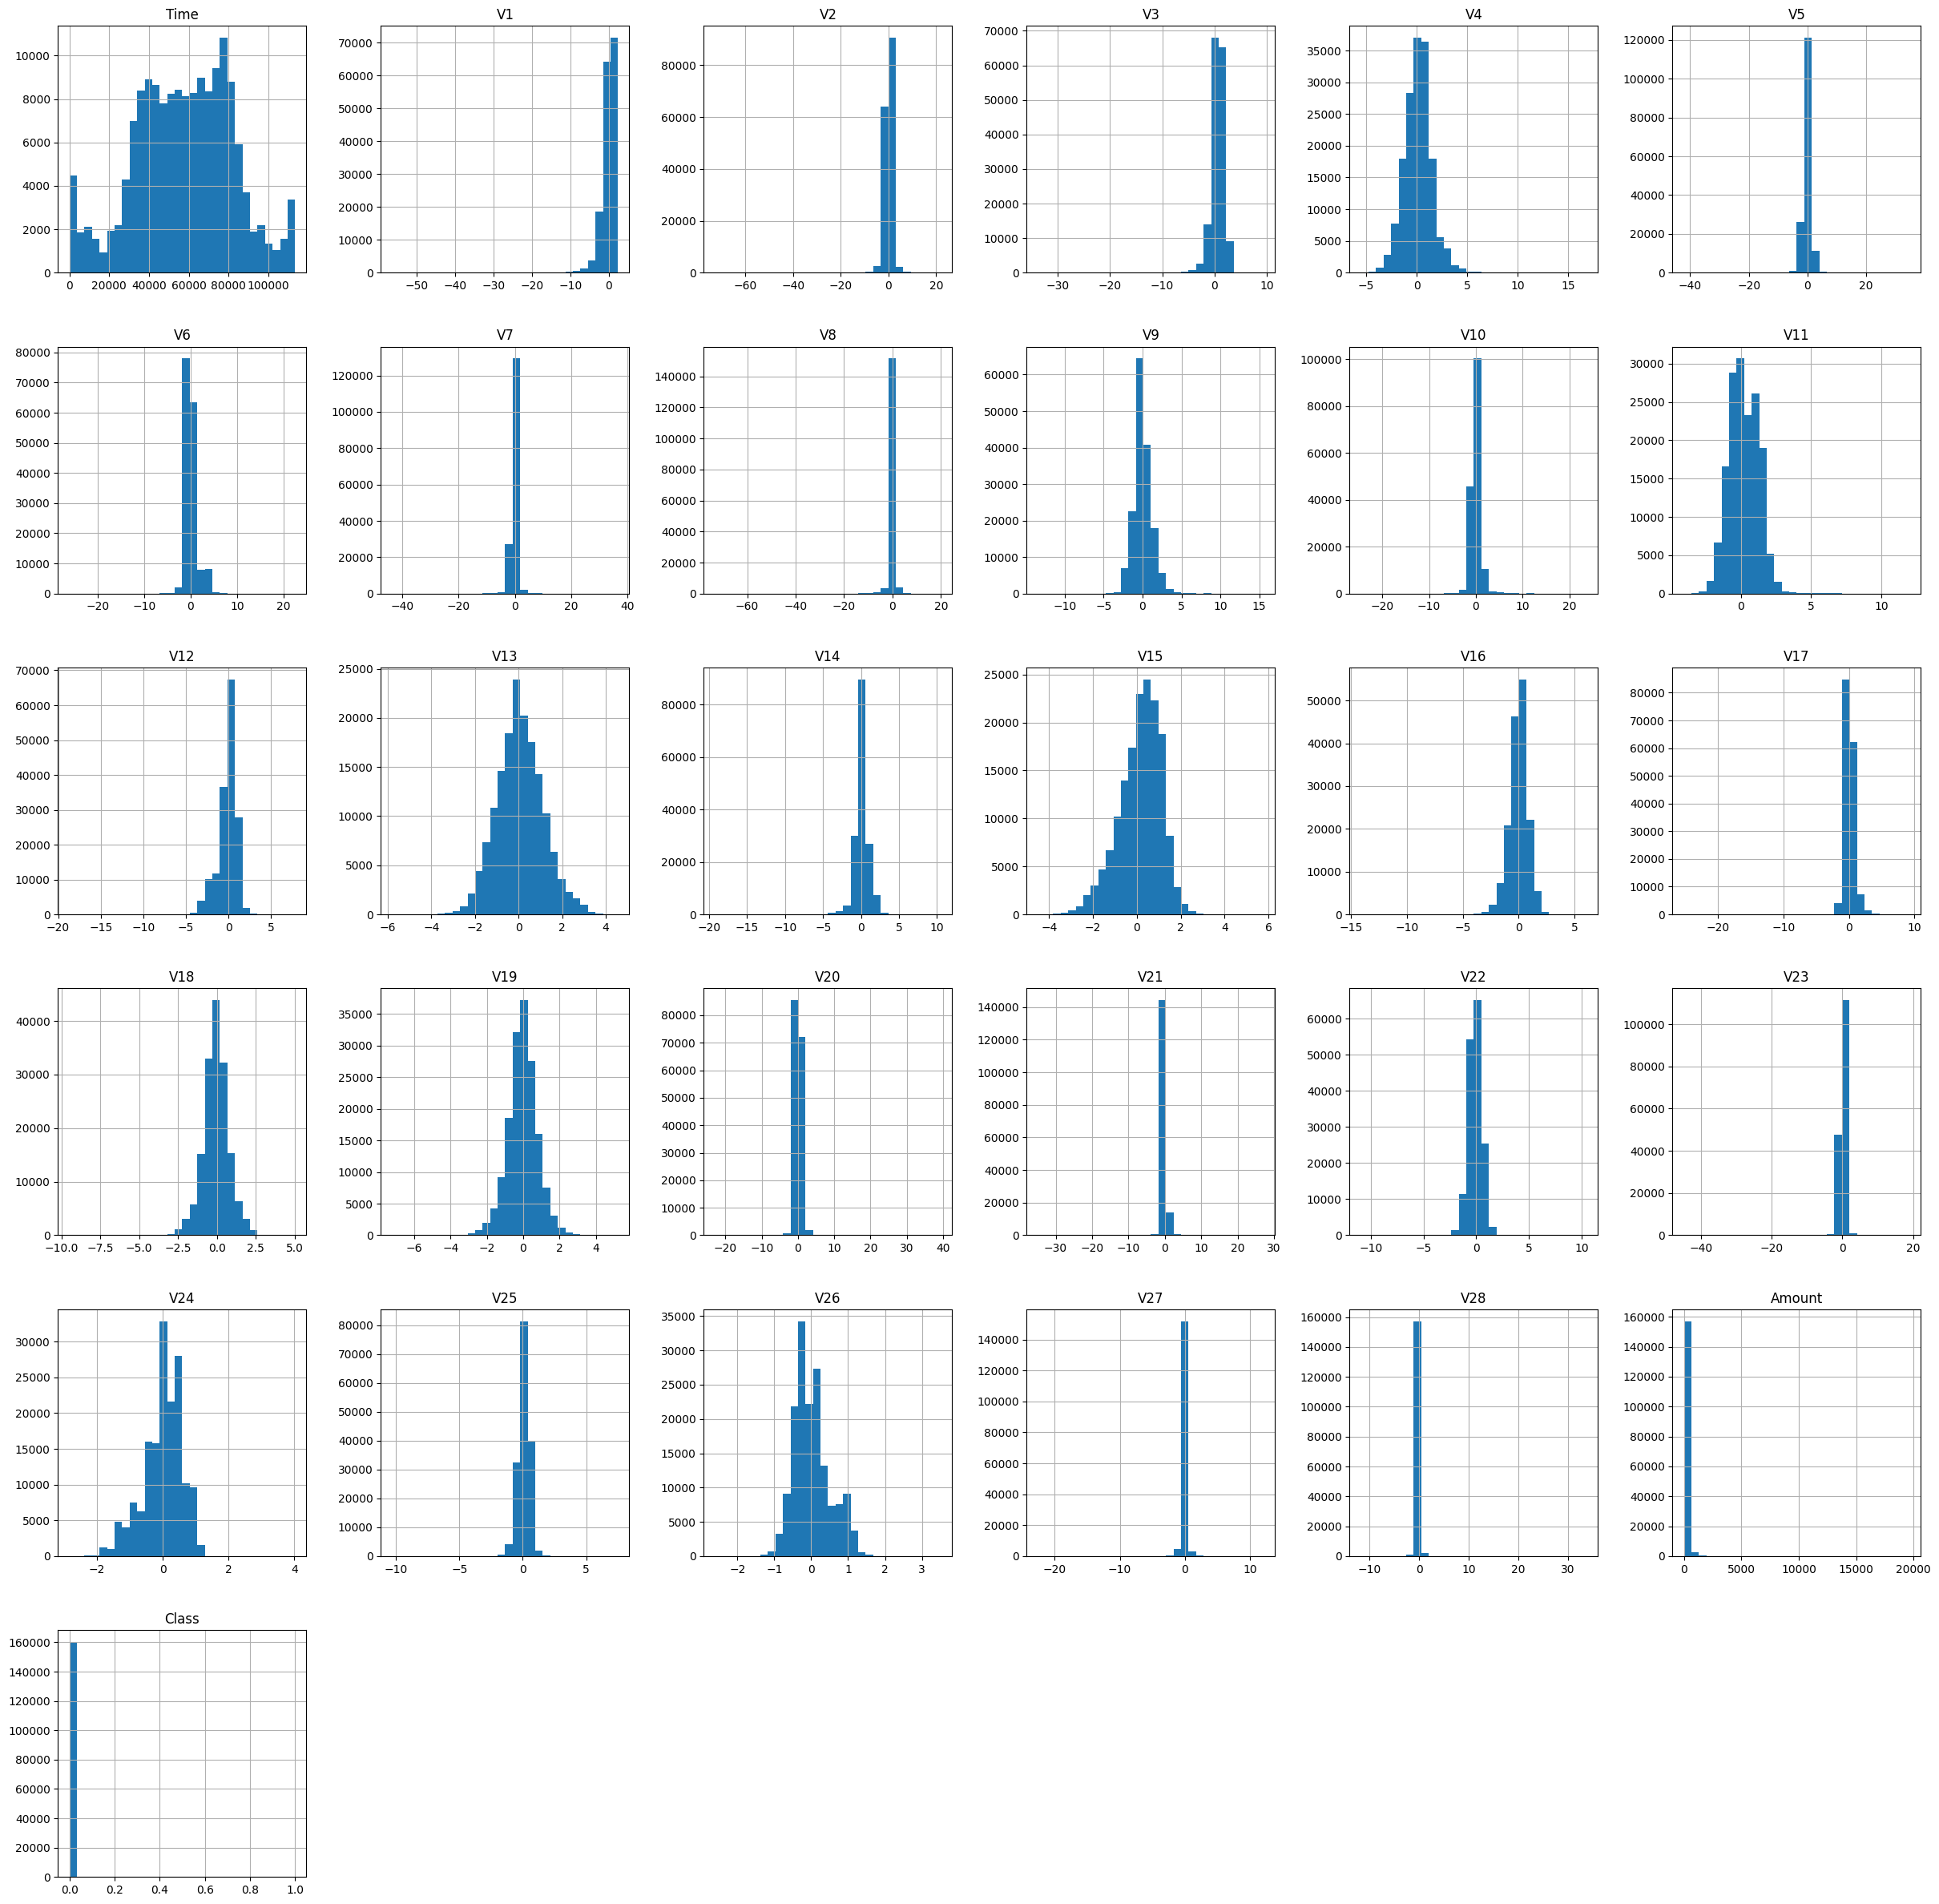

In [19]:
data.hist(bins=30, figsize=(30, 30))

Text(0, 0.5, 'Frequency')

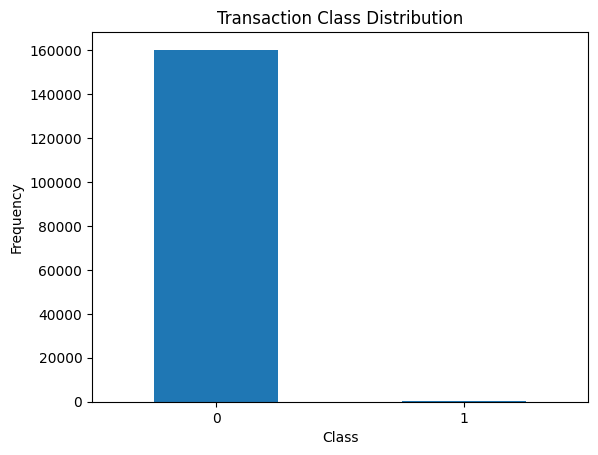

In [20]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

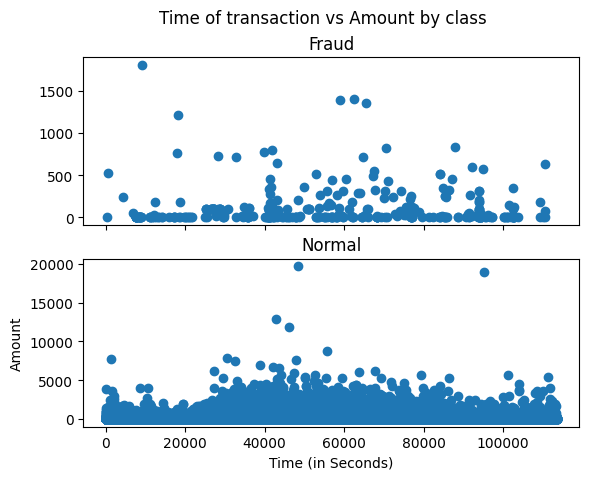

In [21]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [22]:
X = data.drop(columns=['Class'], axis=1)
y = data['Class']

**Standard Scaling**

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [24]:
x_scaler[-1]

array([ 2.27162538,  1.19466807,  0.2458557 , -2.24578175,  0.95017626,
        1.0145799 , -0.64938965,  0.67077376, -0.30315246,  0.07623341,
       -0.30967195, -0.95524414,  0.11848406, -0.08321267, -1.17156748,
       -0.49887626, -0.15063004,  0.89844851,  0.19918475, -0.37320381,
       -0.2474958 , -0.00481147,  0.21759943, -0.05146726,  0.4815157 ,
        0.90547137, -1.0582302 , -0.01865219, -0.07214903, -0.2096318 ])

**Model Training**

In [25]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)

**Class Imbalancement**

In [26]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     40056
           1       0.07      0.93      0.14        89

    accuracy                           0.97     40145
   macro avg       0.54      0.95      0.56     40145
weighted avg       1.00      0.97      0.98     40145

F1 Score: 0.13741721854304637


In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40056
           1       0.89      0.85      0.87        89

    accuracy                           1.00     40145
   macro avg       0.95      0.93      0.94     40145
weighted avg       1.00      1.00      1.00     40145

F1 Score: 0.8735632183908046


**Given the class imbalance ratio, it is good to measuring the accuracy using the ROC_AUC_Score. Confusion matrix accuracy is not meaningful for unbalanced classification.**

In [30]:
from sklearn.metrics import roc_auc_score

In [32]:
y_pred=model.predict(x_test)
roc_auc_score(y_test,y_pred)

0.9268539494146396